<a href="https://colab.research.google.com/github/nvisagan/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


exercise_time   (-0.3, 60.0]       ...        (240.0, 300.0]
age                                ...                      
(17.938, 30.4]            52       ...                    43
(30.4, 42.8]              52       ...                    57
(42.8, 55.2]              41       ...                    67
(55.2, 67.6]              46       ...                    24
(67.6, 80.0]              87       ...                     0

[5 rows x 5 columns]
weight          (99.854, 129.2]       ...        (216.8, 246.0]
exercise_time                         ...                      
(-0.3, 60.0]                 53       ...                    44
(60.0, 120.0]                65       ...                     9
(120.0, 180.0]               71       ...                     0
(180.0, 240.0]               79       ...                     0
(240.0, 300.0]              107       ...                     0

[5 rows x 5 columns]


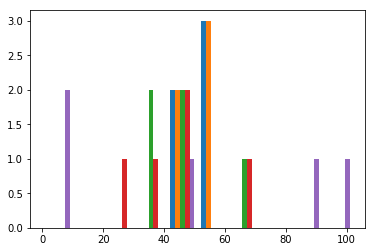

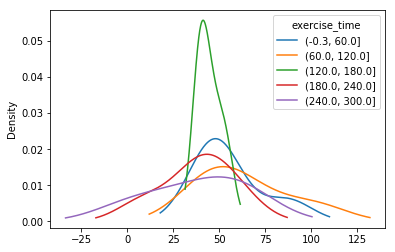

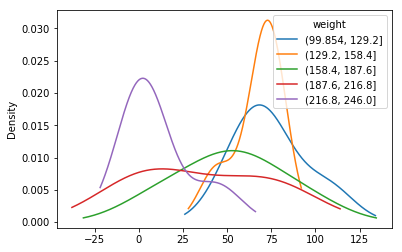

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/nvisagan/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"
df = pd.read_csv(url)
df.head(10)

#Create 5 equal sized exercise time bins (in minutes/week)
exercise_time_bins = pd.cut(df['exercise_time'], 5)
#Create 5 equal bin of the ages
age_bins = pd.cut(df['age'], 5)
#Create 5 equal bins of weight
weight_bins = pd.cut(df['weight'], 5)

ct = pd.crosstab(age_bins, exercise_time_bins)
ct2 = pd.crosstab(exercise_time_bins, weight_bins)


print(ct)
print(ct2)

plt.hist(ct)
ct.plot.kde()

#plt.hist(ct2)
ct2.plot.kde();


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data\
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. The variable types in the data are all dicrete, I chose to bin the age so I beleive this is a categorical and weight and excercise time is also categorical. 
2. From the data, and the graphs, we can make an assumption that older you are the less time you work out. At the same time we can say people with higher weights, tend to work out less.
3. I believe the higher weights = less work is a spurious conclusion, but older age leads to less work is a real relationship.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)